In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

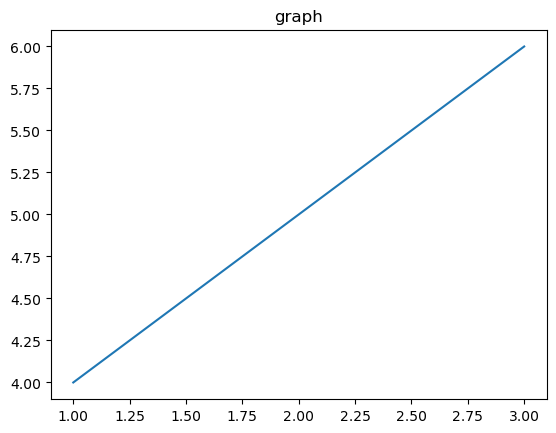

In [2]:
plt.plot([1,2,3],[4,5,6])
plt.title('graph')
plt.show()

In [3]:
# 그래프를 노트북 안에 그리기 실행
%matplotlib inline

import matplotlib as mpl
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'NanumGothic' # 없으면 Malgun Gothic

# 폰트 확인하기
print([f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name])

['NanumGothic', 'NanumGothic', 'NanumGothic']


In [4]:
# 데이터 불러오기
pd.read_csv('../data/서울시 코로나19 확진자 현황.csv')

C:\Users\rladn\AppData\Local\Temp\ipykernel_14740\3359111770.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('../data/서울시 코로나19 확진자 현황.csv')


,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,99550,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
1,99549,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
2,99548,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
3,99547,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
4,99546,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99545,5,2020-01-31,NaN,NaN,NaN,성북구,NaN,기타 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
99546,4,2020-01-30,NaN,NaN,NaN,마포구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
99547,3,2020-01-30,NaN,NaN,NaN,종로구,NaN,종로구 집단발병,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
99548,2,2020-01-30,NaN,NaN,NaN,중랑구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y


In [9]:
raw = pd.read_csv('./data/서울시 코로나19 확진자 현황.csv')
df = raw.copy()

C:\Users\rladn\AppData\Local\Temp\ipykernel_20984\1351121871.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv('./data/서울시 코로나19 확진자 현황.csv')


In [10]:
# 데이터 확인 >> 전처리
# 컬럼별 데이터 확인
df.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,99550,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
1,99549,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
2,99548,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
3,99547,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
4,99546,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y


In [11]:
df.columns

Index(['연번', '확진일', '환자번호', '국적', '환자정보', '지역', '여행력', '접촉력', '조치사항', '상태',
       '이동경로', '등록일', '수정일', '노출여부'],
      dtype='object')

In [12]:
df['이동경로'].unique()

array([nan, '이동경로 공개기간 경과'], dtype=object)

In [13]:
# 불필요한 컬럼 삭제
df.drop(columns=['환자번호','국적','환자정보','조치사항','이동경로', '등록일', '수정일', '노출여부'], inplace=True)
df

,연번,확진일,지역,여행력,접촉력,상태
0,99550,2021-09-28,기타,NaN,감염경로 조사중,-
1,99549,2021-09-28,기타,NaN,감염경로 조사중,-
2,99548,2021-09-28,기타,NaN,감염경로 조사중,-
3,99547,2021-09-28,기타,NaN,감염경로 조사중,-
4,99546,2021-09-28,기타,NaN,감염경로 조사중,-
...,...,...,...,...,...,...
99545,5,2020-01-31,성북구,NaN,기타 확진자 접촉,퇴원
99546,4,2020-01-30,마포구,중국,해외유입,퇴원
99547,3,2020-01-30,종로구,NaN,종로구 집단발병,퇴원
99548,2,2020-01-30,중랑구,중국,해외유입,퇴원


In [15]:
# 자료형 변환 
# 자료형 확인
df.dtypes

연번      int64
확진일    object
지역     object
여행력    object
접촉력    object
상태     object
dtype: object

In [17]:
# 확진일 >> datetime
df['확진일'] = pd.to_datetime(df['확진일'])
df.dtypes

연번              int64
확진일    datetime64[ns]
지역             object
여행력            object
접촉력            object
상태             object
dtype: object

In [18]:
# '지역' 공백 제거
df['지역'].nunique()

29

In [19]:
df['지역'].unique()

array(['기타', '영등포구', '관악구', '서대문구', '송파구', '동대문구', '성동구', '중랑구', '타시도',
       '종로구', '도봉구', '용산구', '마포구', '구로구', '동작구', '강동구', '중구', '노원구',
       '양천구', '강서구', '은평구', '성북구', '광진구', '금천구', '강북구', '강남구', '서초구',
       '타시도 ', ' 성북구'], dtype=object)

In [21]:
# 문자 양쪽 공백 제거 >> 업데이트
df['지역'] = df['지역'].str.strip()
df['지역'].nunique()

27

In [22]:
df['지역'].unique()

array(['기타', '영등포구', '관악구', '서대문구', '송파구', '동대문구', '성동구', '중랑구', '타시도',
       '종로구', '도봉구', '용산구', '마포구', '구로구', '동작구', '강동구', '중구', '노원구',
       '양천구', '강서구', '은평구', '성북구', '광진구', '금천구', '강북구', '강남구', '서초구'],
      dtype=object)

In [23]:
# 지경ㄱ 상태 >> catrgory (지역의 공백 제거)
df['지역'] = df['지역'].astype('category')
df.dtypes

연번              int64
확진일    datetime64[ns]
지역           category
여행력            object
접촉력            object
상태             object
dtype: object

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연번      99550 non-null  int64         
 1   확진일     99550 non-null  datetime64[ns]
 2   지역      99550 non-null  category      
 3   여행력     1717 non-null   object        
 4   접촉력     99550 non-null  object        
 5   상태      99550 non-null  object        
dtypes: category(1), datetime64[ns](1), int64(1), object(3)
memory usage: 3.9+ MB


In [25]:
# 결측치 분석
df.isnull().sum()

연번         0
확진일        0
지역         0
여행력    97833
접촉력        0
상태         0
dtype: int64

In [29]:
# 구 별 확진자 동향
# 확진일-구별 확진자 수 집계

# 피봇 테이블 만들기
df_gu = pd.pivot_table(df,
                index='확진일',
                columns='지역',
                values='연번',
                aggfunc='count',
                margins=True)

df_gu

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,All
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24 00:00:00,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-30 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,3
2020-01-31 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,3
2020-02-02 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2020-02-05 00:00:00,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-25 00:00:00,37,41,42,48,37,34,31,39,0,27,...,88,20,35,32,31,31,24,35,31,928
2021-09-26 00:00:00,43,17,27,29,37,37,72,19,0,25,...,55,12,40,13,38,33,27,26,32,778
2021-09-27 00:00:00,50,29,20,50,23,34,58,16,0,37,...,58,27,41,28,17,20,22,18,63,842


In [30]:
# 서울시 일별 추가 확진자 동향
df_gu['All']

확진일
2020-01-24 00:00:00        1
2020-01-30 00:00:00        3
2020-01-31 00:00:00        3
2020-02-02 00:00:00        1
2020-02-05 00:00:00        2
                       ...  
2021-09-25 00:00:00      928
2021-09-26 00:00:00      778
2021-09-27 00:00:00      842
2021-09-28 00:00:00     1054
All                    99550
Name: All, Length: 583, dtype: int64

In [31]:
# All                    99550 : 합계값 빼고 보기
df_gu['All'][:-1]

확진일
2020-01-24       1
2020-01-30       3
2020-01-31       3
2020-02-02       1
2020-02-05       2
              ... 
2021-09-24    1222
2021-09-25     928
2021-09-26     778
2021-09-27     842
2021-09-28    1054
Name: All, Length: 582, dtype: int64

In [32]:
s_date = df_gu['All'][:-1]

In [33]:
# 서울시 일별 추가확진자가 많았던 순으로 보기
s_date.sort_values(ascending=False)

확진일
2021-09-24    1222
2021-09-28    1054
2021-09-25     928
2021-09-23     905
2021-09-27     842
              ... 
2020-04-24       1
2020-04-30       1
2020-05-01       1
2020-05-17       1
2020-01-24       1
Name: All, Length: 582, dtype: int64

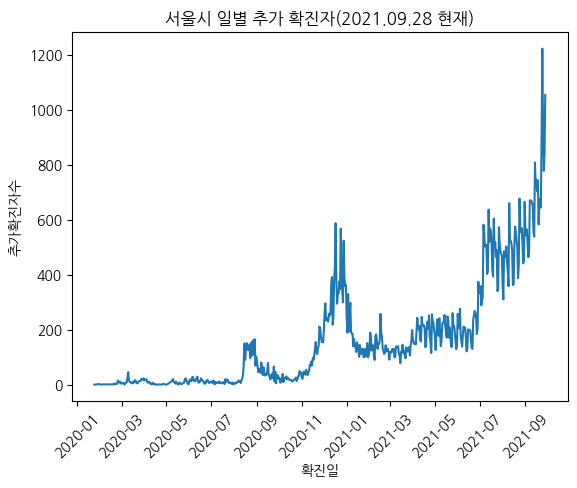

In [34]:
# 서울시 일별 추가 확진자 시각화
x = s_date.index    # 일자
y = s_date.values   # 확진자 수

plt.plot(x,y)
plt.title('서울시 일별 추가 확진자(2021.09.28 현재)')
plt.xlabel('확진일')
plt.ylabel('추가확진자수')
plt.xticks(rotation=45)
plt.show()

In [35]:
# 서울시 구별 누적확진자 비교
df_gu.loc['All'][:-1]

지역
강남구     6926
강동구     3782
강북구     2606
강서구     4447
관악구     5418
광진구     3486
구로구     4168
금천구     2064
기타      2321
노원구     3932
도봉구     2605
동대문구    3487
동작구     4120
마포구     3726
서대문구    2692
서초구     4284
성동구     2839
성북구     3779
송파구     6356
양천구     3291
영등포구    4463
용산구     2705
은평구     4284
종로구     1617
중구      1708
중랑구     3729
타시도     4715
Name: All, dtype: int64

In [36]:
s_gu = df_gu.loc['All'][:-1]

# 서울시 구별 누적확진자가 많은 순으로 보기
s_gu = s_gu.sort_values(ascending=False)
s_gu

지역
강남구     6926
송파구     6356
관악구     5418
타시도     4715
영등포구    4463
강서구     4447
은평구     4284
서초구     4284
구로구     4168
동작구     4120
노원구     3932
강동구     3782
성북구     3779
중랑구     3729
마포구     3726
동대문구    3487
광진구     3486
양천구     3291
성동구     2839
용산구     2705
서대문구    2692
강북구     2606
도봉구     2605
기타      2321
금천구     2064
중구      1708
종로구     1617
Name: All, dtype: int64

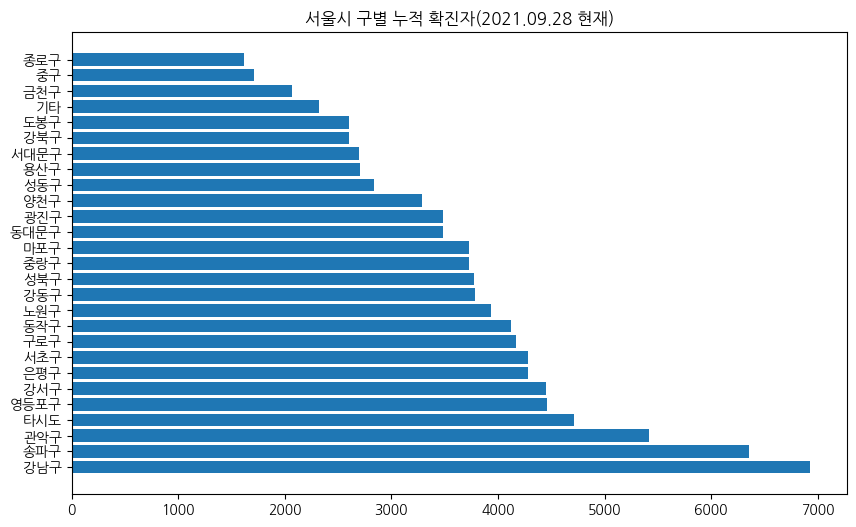

In [37]:
# 서울시 구별 누적확진자 시각화
x = s_gu.index  # 구
y = s_gu.values # 누적확진자수

plt.figure(figsize=(10,6))
plt.title('서울시 구별 누적 확진자(2021.09.28 현재)')
plt.barh(x,y)   # 가로 막대 그래프
plt.show()

In [40]:
# 최근일 기준, 지역별 추가 확진자
df_gu

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,All
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24 00:00:00,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-30 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,3
2020-01-31 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,3
2020-02-02 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2020-02-05 00:00:00,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-25 00:00:00,37,41,42,48,37,34,31,39,0,27,...,88,20,35,32,31,31,24,35,31,928
2021-09-26 00:00:00,43,17,27,29,37,37,72,19,0,25,...,55,12,40,13,38,33,27,26,32,778
2021-09-27 00:00:00,50,29,20,50,23,34,58,16,0,37,...,58,27,41,28,17,20,22,18,63,842


In [39]:
df_gu.iloc[-2]
# 데이터프레임에서 뒤에서 두 번째 행

지역
강남구       45
강동구       51
강북구       25
강서구       41
관악구       48
광진구       36
구로구       55
금천구       31
기타        65
노원구       29
도봉구       35
동대문구      66
동작구       28
마포구       47
서대문구      30
서초구       19
성동구       24
성북구       41
송파구       68
양천구       27
영등포구      43
용산구       24
은평구       47
종로구       23
중구        37
중랑구       26
타시도       43
All     1054
Name: 2021-09-28 00:00:00, dtype: int64

In [41]:
df_gu.iloc[-2][:-1] # 선택한 행에서 마지막 열 제외

지역
강남구     45
강동구     51
강북구     25
강서구     41
관악구     48
광진구     36
구로구     55
금천구     31
기타      65
노원구     29
도봉구     35
동대문구    66
동작구     28
마포구     47
서대문구    30
서초구     19
성동구     24
성북구     41
송파구     68
양천구     27
영등포구    43
용산구     24
은평구     47
종로구     23
중구      37
중랑구     26
타시도     43
Name: 2021-09-28 00:00:00, dtype: int64

In [42]:
s_gu = df_gu.iloc[-2][:-1]

In [43]:
s_gu = s_gu.sort_values(ascending=False)
s_gu

지역
송파구     68
동대문구    66
기타      65
구로구     55
강동구     51
관악구     48
마포구     47
은평구     47
강남구     45
타시도     43
영등포구    43
성북구     41
강서구     41
중구      37
광진구     36
도봉구     35
금천구     31
서대문구    30
노원구     29
동작구     28
양천구     27
중랑구     26
강북구     25
성동구     24
용산구     24
종로구     23
서초구     19
Name: 2021-09-28 00:00:00, dtype: int64

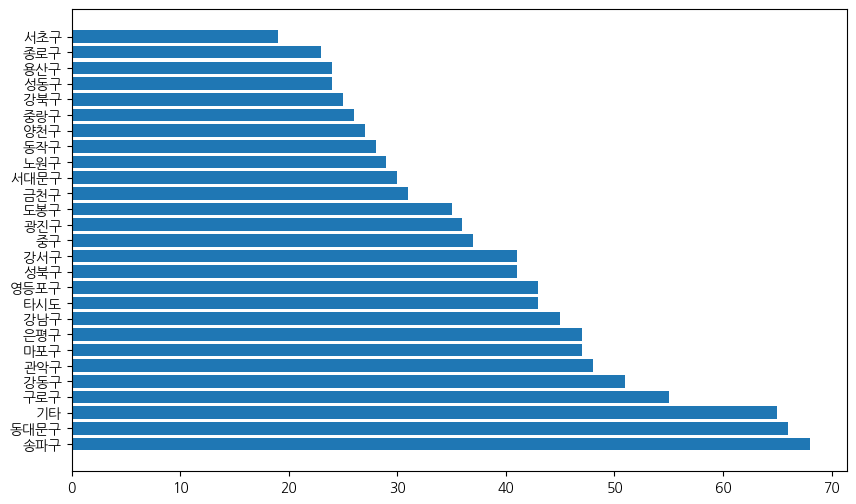

In [44]:
# 시각화
x = s_gu.index
y = s_gu.values
plt.figure(figsize=(10,6))
plt.barh(x,y)
plt.show()

In [45]:
# 접촉력에 따른 확진 분석

# 접촉력에 따른 확진 건수 베스트 10 선정
df['접촉력']

0         감염경로 조사중
1         감염경로 조사중
2         감염경로 조사중
3         감염경로 조사중
4         감염경로 조사중
           ...    
99545    기타 확진자 접촉
99546         해외유입
99547     종로구 집단발병
99548         해외유입
99549         해외유입
Name: 접촉력, Length: 99550, dtype: object

In [48]:
df['접촉력'].value_counts()[:10].to_frame()

,count
접촉력,
기타 확진자 접촉,37943
감염경로 조사중,31964
타시도 확진자 접촉,4244
해외유입,1729
동부구치소 관련,1175
병원 및 요양시설,988
송파구 소재 시장 관련(?21.9.),659
성북구 사랑제일교회 관련,641
중구 소재 시장 관련(?21.9.),277


In [49]:
# 최근 월 접촉력에 따른 확진 건수 베스트 10 선정
# 이 데이터에서는 2021-09 만 뽑아야함 
df['확진일']

0       2021-09-28
1       2021-09-28
2       2021-09-28
3       2021-09-28
4       2021-09-28
           ...    
99545   2020-01-31
99546   2020-01-30
99547   2020-01-30
99548   2020-01-30
99549   2020-01-24
Name: 확진일, Length: 99550, dtype: datetime64[ns]

In [60]:
condition = (df['확진일'].dt.year == 2021) & (df['확진일'].dt.month == 9)
df[condition]['접촉력'].value_counts()[:10].to_frame()

,count
접촉력,
감염경로 조사중,8117
기타 확진자 접촉,8088
송파구 소재 시장 관련(?21.9.),658
타시도 확진자 접촉,587
중구 소재 시장 관련(?21.9.),277
병원 및 요양시설,186
해외유입,122
용산구 소재 병원 관련(?21.9.),77
동대문구 소재 시장 관련,44
